In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np; np.set_printoptions(precision=4,suppress=True)
np.random.seed(0)
from extquadcontrol import ExtendedQuadratic, dp_infinite, dp_finite
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def solve(abar,bbar,Sigma_aa,Sigma_bb,num_iterations,N):
    Amean = abar*np.ones((1,1,1,1))
    Bmean = bbar*np.ones((1,1,1,1))
    def sample(t, N):
        A = Amean + np.sqrt(Sigma_aa)*np.random.randn(N,1,1,1)
        B = Bmean + np.sqrt(Sigma_bb)*np.random.randn(N,1,1,1)
        c = np.zeros((N,1,1))
        g = [[ExtendedQuadratic(np.eye(2),np.zeros(2),0)] for _ in range(N)]
        Pi = np.eye(1)

        return A,B,c,g,Pi
    g_T = [ExtendedQuadratic(np.zeros((1,1)),np.zeros(1),0)]
    Vs, Qs, policies = dp_finite(sample, g_T, num_iterations, N)
    return Vs, Qs, policies

/home/shane/miniconda3/envs/extquadcontrol/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


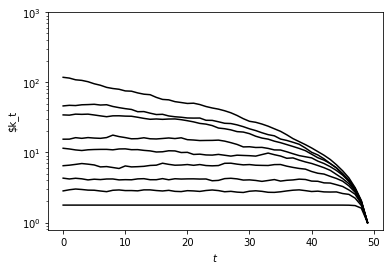

In [4]:
plt.figure()
for Sigma_bb in [0,.81,1.44,2.25,2.89,3.61,4.41,4.84,5.76]:
    Vs, Qs, policies = solve(1.1,1.,0,Sigma_bb,50,1000)
    plt.semilogy([Vs[i][0].P[0,0] for i in range(50)], c='black')
plt.ylim(0,1000)
plt.xlabel('$t$')
plt.ylabel('$k_t')
plt.savefig('figs/random1.pdf')

/home/shane/miniconda3/envs/extquadcontrol/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


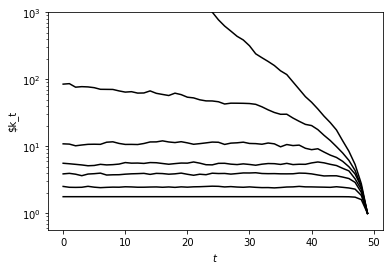

In [5]:
plt.figure()
for Sigma_aa in [0,.25,0.49,0.64,0.81,1.00,1.21]:
    Vs, Qs, policies = solve(1.1,1.,Sigma_aa,0,50,1000)
    plt.semilogy([Vs[i][0].P[0,0] for i in range(50)], c='black')
plt.ylim(0,1000)
plt.xlabel('$t$')
plt.ylabel('$k_t')
plt.savefig('figs/random2.pdf')

/home/shane/miniconda3/envs/extquadcontrol/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


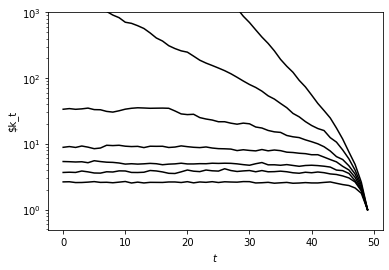

In [6]:
plt.figure()
for Sigma_aa in [0,.16,.25,0.36,0.49,0.64,.81]:
    Vs, Qs, policies = solve(1.1,1.,Sigma_aa,0.64,50,1000)
    plt.semilogy([Vs[i][0].P[0,0] for i in range(50)], c='black')
plt.ylim(0,1000)
plt.xlabel('$t$')
plt.ylabel('$k_t')
plt.savefig('figs/random3.pdf')

### Random example
Add i.i.d. noise to A and B.

In [7]:
n = 5
m = 10
K = 1
N = 1000
T = 50

In [8]:
Amean = np.eye(n).reshape(1,1,n,n)
Bmean = np.random.randn(1,1,n,m)
def sample(N):
    A = Amean + 0.2*np.random.uniform(-1,1,size=(N,K,n,n))
    B = Bmean + 0.2*np.random.uniform(-1,1,size=(N,K,n,m))
    c = np.zeros((N,K,n))
    g = [[ExtendedQuadratic(np.eye(n+m),np.zeros(n+m),0)] for _ in range(N)]
    Pi = np.eye(K)
    
    return A,B,c,g,Pi

In [9]:
V, Q, policy = dp_infinite(sample, num_iterations=10, N=N)

In [10]:
V[0].P

array([[ 1.1886, -0.0242,  0.0051,  0.0464, -0.0158],
       [-0.0242,  1.2017,  0.0491, -0.0221, -0.0775],
       [ 0.0051,  0.0491,  1.3032,  0.0742, -0.0625],
       [ 0.0464, -0.0221,  0.0742,  1.3001, -0.0248],
       [-0.0158, -0.0775, -0.0625, -0.0248,  1.2248]])

In [11]:
policies[0][0]

(array([[-0.6392]]), array([0.]))

In [12]:
# c.f. certainty-equivalent solution
from scipy.linalg import solve_discrete_are
solve_discrete_are(np.eye(n),Bmean[0,0],np.eye(n),np.eye(m))

array([[ 1.097 , -0.021 ,  0.0042,  0.0411, -0.0128],
       [-0.021 ,  1.1114,  0.0452, -0.0216, -0.0735],
       [ 0.0042,  0.0452,  1.2049,  0.0683, -0.0561],
       [ 0.0411, -0.0216,  0.0683,  1.1988, -0.0209],
       [-0.0128, -0.0735, -0.0561, -0.0209,  1.1294]])